### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>1. Importing Libraries and Loading Data</strong></span>

In [2]:
# Import libraries
import pandas as pd
import numpy as np

We have two data frames:
- `df_achi` decodes ACHI code its procedure name and description
- `df_raw` is the patient data from Jennifer and team

In [3]:
# Read ACHI data
path_achi = 'data/interven.txt'
df_achi = pd.read_csv(path_achi)

In [4]:
# First few rows of ACHI data frame
df_achi.head()

,Code_id,Block,ascii_desc,ascii_short_desc,effective_from,inactive,sex,Stype,AgeL,AgeH,Atype
0,10801-00,1837,"Investigation, evaluation or fitting of contac...",Investgtn evaln/fitting contact lenses,1/7/1998,1/7/2000,NaN,NaN,NaN,NaN,NaN
1,10816-00,1837,Refitting of contact lenses,Refitting of contact lenses,1/7/1998,1/7/2000,NaN,NaN,NaN,NaN,NaN
2,11000-00,1825,Electroencephalography,Electroencephalography,1/7/1998,NaN,NaN,NaN,NaN,NaN,NaN
3,11003-00,1825,Electroencephalography of >= 3 hours duration,Electroencephalography of >= 3 hours,1/7/1998,NaN,NaN,NaN,NaN,NaN,NaN
4,11006-00,1825,Temporosphenoidal electroencephalography,Temporosphenoidal electroencephalography,1/7/1998,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Read raw patient data
path_raw = '/Users/kevingiam/Aspera/FIT-Anaesthetist-Patient-Registry/Patient Registry Dataset (Shared)/PCORETestData_DATA_LABELS_2022-11-03_1002.csv'
df_raw = pd.read_csv(path_raw)

/var/folders/hx/bb3zm06j25b4j5wb97_l5rb00000gn/T/ipykernel_37394/2607410961.py:3: DtypeWarning: Columns (8,11,12,17,18,21,22,23,24,27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(path_raw)


In [6]:
# First few rows of patient data
df_raw.head()

,Record ID,Data Access Group,Hospital Registry ID,Hospital public/private,Hospital postcode,Hospital Statistical Level Area 2 (SLA2),Registry Participant ID,Date of Birth,Sex,Australian Postcode,...,Critical Care Admission Status,ICU Adult Patient Database Identifier,Critical Care Length of Stay,Critical Care Ventilated Hours - Invasive,Critical Care Ventilated Hours - Non-Invasive,Separation Date,Separation Mode,Date of Death,Postoperative Length of Stay,Complete?
0,1,FMC,Flinders Medical Centre,NaN,NaN,NaN,NaN,15/11/1944,2,5162.0,...,NaN,NaN,0.0,0.0,NaN,17/8/2019,9,NaN,1.0,Incomplete
1,2,FMC,Flinders Medical Centre,NaN,NaN,NaN,NaN,20/2/1954,1,5052.0,...,NaN,NaN,0.0,0.0,NaN,18/10/2019,9,NaN,1.0,Incomplete
2,3,FMC,Flinders Medical Centre,NaN,NaN,NaN,NaN,26/8/1939,2,5167.0,...,NaN,NaN,0.0,0.0,NaN,12/8/2019,9,NaN,3.0,Incomplete
3,4,FMC,Flinders Medical Centre,NaN,NaN,NaN,NaN,4/1/1958,2,5162.0,...,NaN,NaN,0.0,0.0,NaN,3/7/2019,9,NaN,2.0,Incomplete
4,5,FMC,Flinders Medical Centre,NaN,NaN,NaN,NaN,20/6/1942,2,5038.0,...,NaN,NaN,0.0,0.0,NaN,2/8/2019,9,NaN,0.0,Incomplete


### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>2. df_achi: Data Cleaning</strong></span>

The next step is to perform data cleaning for `df_achi` data frame. The following procedures are performed:
- Standardise column names
- Remove hyphen from `achi_id` column so it can be merged with `df_raw` later

In [7]:
# Standardise column name
df_achi.rename(
    columns={
        'Code_id'           : 'achi_id',
        'Block'             : 'block',
        'ascii_desc'        : 'achi_long',
        'ascii_short_desc'  : 'achi_short',
        'Stype'             : 's_type',
        'AgeL'              : 'age_l',
        'AgeH'              : 'age_h',
        'Atype'             : 'a_type'
    },
    inplace=True
)

In [8]:
# Remove hyphen
df_achi['achi_id'].replace(
    {
        '-'  : ''
    },
    inplace=True,
    regex=True
)

### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>3. df_raw: Data Cleaning</strong></span>

Then, we can perform data cleaning for `df_raw` data frame. The following procedures are performed:
- Standardise column names
- Drop columns (mainly columns with too many missing values and/or won't add any values to the analysis)
- Fix missing data in `p_surgery_date`
- Convert date string to appropriate format
- Clean and standardise `p_sex`, `p_atsi`, `p_election`, `p_admission_urgency`, `p_surgery_urgency`, `p_surgery_type`, `p_asa_ps`, `p_clinical_frailty_scale`, `p_cancer`, `p_critical_care_bed_request`, `p_critical_care_admission_status`, and `p_separation_mode` according to the data dictionary
- Get the ACHI code for each hospitals and store it in `p_achi_id` column
- Calculate patient age at surgery and store it in `p_surgery_age` column
- Calculate patient length of stay and store it in `p_achi_id` column

The following code is to standardise the column names for our downstream analysis.

In [9]:
# Standardise column names
df_raw.rename(
    columns={
        'Record ID'                                     : 'record_id',
        'Data Access Group'                             : 'data_access_group',
        'Hospital Registry ID'                          : 'h_name',
        'Hospital public/private'                       : 'h_public_private',
        'Hospital postcode'                             : 'h_postcode',
        'Hospital Statistical Level Area 2 (SLA2)'      : 'h_sla2',
        'Registry Participant ID'                       : 'p_id',
        'Date of Birth'                                 : 'p_birth_date',
        'Sex'                                           : 'p_sex',
        'Australian Postcode'                           : 'p_postcode',
        'Statistical Area level 2 Code'                 : 'p_sla2',
        'ATSI Status'                                   : 'p_atsi',
        'Patient Election Status'                       : 'p_election',
        'Date of Admission'                             : 'p_admission_date',
        'Admission Urgency Status'                      : 'p_admission_urgency',
        'Date of Surgery'                               : 'p_surgery_date',
        'Age at Date of Surgery'                        : 'p_surgery_age',
        'Surgical Urgency'                              : 'p_surgery_urgency',
        'Type of Surgery'                               : 'p_surgery_type',
        'Name of Procedure'                             : 'p_procedure_name',
        'Procedure Code'                                : 'p_procedure_code',
        'Principal Diagnosis Code'                      : 'p_principal_diagnosis_code',
        'ASA-PS'                                        : 'p_asa_ps',
        'Clinical Frailty Scale'                        : 'p_clinical_frailty_scale',
        'Albumin'                                       : 'p_albumin',
        'Cancer Status'                                 : 'p_cancer',
        'Additional Diagnosis Codes'                    : 'p_additional_diagnosis_code',
        'Critical Care Bed Request'                     : 'p_critical_care_bed_request',
        'Critical Care  Admission Status'               : 'p_critical_care_admission_status',
        'ICU Adult Patient Database Identifier'         : 'p_icu_identifier',
        'Critical Care Length of Stay'                  : 'p_critical_care_hours_los',
        'Critical Care Ventilated Hours - Invasive'     : 'p_critical_care_hours_ventilated_invasive',
        'Critical Care Ventilated Hours - Non-Invasive' : 'p_critical_care_hours_ventilated_non_invasive',
        'Separation Date'                               : 'p_separation_date',
        'Separation Mode'                               : 'p_separation_mode',
        'Date of Death'                                 : 'p_death_date',
        'Postoperative Length of Stay'                  : 'p_postoperative_days_los',
        'Complete?'                                     : 'complete_status'
    },
    inplace=True
)

These columns contain too many missing values and/or won't add any values to the analysis.

In [10]:
# Drop unnecessary columns
df_raw.drop(
    columns=[
        'record_id', 
        'data_access_group', 
        'h_public_private', 
        'h_postcode',
        'h_sla2',
        'p_id',
        'complete_status',
        'p_icu_identifier',
        'p_sla2',
    ],
    inplace = True,
    errors='ignore'
)

Since the total missing data in `p_surgery_date` column is only two rows, we can impute the value using `p_admission_date` without significantly impact our downstream analysis.

In [11]:
# Fix missing surgery dates
print(f"Total missing data before imputation: {df_raw['p_surgery_date'].isnull().sum()}")
df_raw['p_surgery_date'] = df_raw['p_surgery_date'].fillna(df_raw['p_admission_date'])
print(f"Total missing data after imputation: {df_raw['p_surgery_date'].isnull().sum()}")

Total missing data before imputation: 2
Total missing data after imputation: 0


The following code is to parse the dates according to pandas date time format.

In [12]:
# Parse dates
df_raw['p_birth_date'] = pd.to_datetime(df_raw['p_birth_date'], format=r'%d/%m/%Y', exact=True)
df_raw['p_admission_date'] = pd.to_datetime(df_raw['p_admission_date'], format=r'%d/%m/%Y', exact=True)
df_raw['p_surgery_date'] = pd.to_datetime(df_raw['p_surgery_date'], format=r'%d/%m/%Y', exact=True)
df_raw['p_separation_date'] = pd.to_datetime(df_raw['p_separation_date'], format=r'%d/%m/%Y', exact=True)
df_raw['p_death_date'] = pd.to_datetime(df_raw['p_death_date'], format=r'%d/%m/%Y', exact=True)

The following code is to clean the following columns according to the data dictionary:
- `p_sex`
- `p_atsi`
- `p_election`
- `p_admission_urgency`
- `p_surgery_urgency`
- `p_surgery_type`
- `p_asa_ps`
- `p_clinical_frailty_scale`
- `p_cancer`
- `p_critical_care_bed_request`
- `p_critical_care_admission_status`
- `p_separation_mode`

For example, the data in `p_sex` column contains string and integer. However, we can replace the integer `1` to `Male` and integer `2` to `Female` based on the data dictionary

In [13]:
# Clean sex column
df_raw['p_sex'].replace(
    {
        '1'     : 'Male',
        1       : 'Male',
        'MALE'  : 'Male',
        '2'     : 'Female',
        2       : 'Female',
        'FEMALE': 'Female',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

# Clean atsi column
df_raw['p_atsi'].replace(
    {
        '1': 'Aboriginal not Torres Strait Islander',      1: 'Aboriginal not Torres Strait Islander',
        '2': 'Torres Strait Islander not Aboriginal',      2: 'Torres Strait Islander not Aboriginal',
        '3': 'Both Aboriginal & Torres Strait Islander',   3: 'Both Aboriginal & Torres Strait Islander',
        '4': 'Not Aboriginal or Torres Strait Islander',   4: 'Not Aboriginal or Torres Strait Islander',
        '9': 'Not Stated-Unknown',                         9: 'Not Stated-Unknown',
        ' ': np.nan,
        # np.nan  : 'Not Stated-Unknown',
        # ' '     : 'Not Stated-Unknown'
    },
    inplace=True
)

# Clean election column
df_raw['p_election'].replace(
    {
        1                                       : 'Public',
        2                                       : 'Private',
        'Private - Insured'                     : 'Private',
        'Overseas Visitor'                      : 'Other types',
        'Overseas Visitors'                     : 'Other types',
        'Overseas Visitors - Public Ineligible' : 'Other types',
        'Bulk Bill'                             : 'Other types',
        'Transport Accident Commission'         : 'Other types',
        'Workcover'                             : 'Other types',
        'Department of Veterans Affairs'        : 'Other types',
        'Transitional Care Program'             : 'Other types',
        'Other Compensable'                     : 'Other types',
        'Reciprocal Health Care Agreement'      : 'Other types',
        'Organ Procurement'                     : 'Other types',
        'To Be Confirmed'                       : 'Not Stated-Unknown',
        'Not Specified'                         : 'Not Stated-Unknown',
        ' ': np.nan,
        # np.nan                                  : 'Not Stated-Unknown',
        # ' '                                     : 'Not Stated-Unknown'
    },
    inplace=True
)

# Clean admission urgency column
df_raw['p_admission_urgency'].replace(
    {
        1       : 'Emergency',
        2       : 'Elective',
        3       : 'Not Stated-Unknown',
        9       : 'Not Stated-Unknown',
        ' ': np.nan,
        # np.nan  : 'Not Stated-Unknown',
        # ' '     : 'Not Stated-Unknown'
    },
    inplace=True
)

# Clean surgery urgency column
df_raw['p_surgery_urgency'].replace(
    {
        1               : 'Elective',
        '1'             : 'Elective',
        2               : 'Inpatient urgent',
        '2'             : 'Inpatient urgent',
        3               : 'Emergency',
        '3'             : 'Emergency',
        4               : 'Immediate',
        '4'             : 'Immediate',
        ' ': np.nan,
        # np.nan          : np.nan,
        # ' '             : np.nan,
    },
    inplace=True
)

# Clean surgery type column
df_raw['p_surgery_type'] = df_raw['p_surgery_type'].str.replace(r'^zzz', '', regex=True)

df_raw['p_surgery_type'].replace(
    {
        ' of$'  : '',
        np.nan  : np.nan,
        '^ $'   : np.nan,
    },
    inplace=True,
    regex=True
)

# Clean ASA-PS
df_raw['p_asa_ps'].replace(
    {
        '1'     : 1, 1.0     : 1, '1E'     : 1,
        '2'     : 2, 2.0     : 2, '2E'     : 2,
        '3'     : 3, 3.0     : 3, '3E'     : 3,
        '4'     : 4, 4.0     : 4, '4E'     : 4,
        '5'     : 5, 5.0     : 5, '5E'     : 5,
        '9E'    : np.nan,
        ' '     : np.nan
    },
    inplace=True
)

# Clean clinical fratility scale
df_raw['p_clinical_frailty_scale'].replace(
    {
        '1': '1 - Very fit',               1: '1 - Very fit',             1.0: '1 - Very fit',
        '2': '2 - Well',                   2: '2 - Well',                 2.0: '2 - Well',
        '3': '3 - Managing well',          3: '3 - Managing well',        3.0: '3 - Managing well',
        '4': '4 - Vulnerable',             4: '4 - Vulnerable',           4.0: '4 - Vulnerable',
        '5': '5 - Mildly frail',           5: '5 - Mildly frail',         5.0: '5 - Mildly frail',
        '6': '6 - Moderately frail',       6: '6 - Moderately frail',     6.0: '6 - Moderately frail',
        '7': '7 - Severely frail',         7: '7 - Severely frail',       7.0: '7 - Severely frail',
        '8': '8 - Very severely frail',    8: '8 - Very severely frail',  8.0: '8 - Very severely frail',
        '9': '9 - Terminally ill',         9: '9 - Terminally ill',       9.0: '9 - Terminally ill',
        'Well, with comorbid disease': '2 - Well',
        np.nan          : np.nan,
        ' '             : np.nan,
    },
    inplace=True
)

# Clean cancer data
df_raw['p_cancer'].replace(
    {
        '0'     : '0 - No cancer',
        0       : '0 - No cancer',
        0.0     : '0 - No cancer',
        '1'     : '1 - Cancer, leukaemia or lymphoma',
        1       : '1 - Cancer, leukaemia or lymphoma',
        1.0     : '1 - Cancer, leukaemia or lymphoma',
        '2'     : '2 - Solid malignancy with local lymph node involvement',
        2       : '2 - Solid malignancy with local lymph node involvement',                 
        2.0     : '2 - Solid malignancy with local lymph node involvement',
        '3'     : '3 - Solid malignancy with distant metastases',
        3       : '3 - Solid malignancy with distant metastases',
        3.0     : '3 - Solid malignancy with distant metastases',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

# Clean critical care bed request
df_raw['p_critical_care_bed_request'].replace(
    {
        '0'     : 'No',
        0       : 'No',
        0.0     : 'No',
        '1'     : 'Yes',
        1       : 'Yes',
        1.0     : 'Yes',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

# Clean critical care admission status
df_raw['p_critical_care_admission_status'].replace(
    {
        '0'     : 'Not admitted',
        0       : 'Not admitted',
        0.0     : 'Not admitted',
        '1'     : 'Planned admission',
        1       : 'Planned admission',
        1.0     : 'Planned admission',
        '2'     : 'Unplanned admission',
        2       : 'Unplanned admission',
        2.0     : 'Unplanned admission',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

# Clean separation mode
df_raw['p_separation_mode'].replace(
    {
        '1'     : 'Acute hospital',                         1       : 'Acute hospital',                         1.0     : 'Acute hospital',
        '2'     : 'Residential aged care service',          2       : 'Residential aged care service',          2.0     : 'Residential aged care service',
        '3'     : 'Psychiatric hospital',                   3       : 'Psychiatric hospital',                   3.0     : 'Psychiatric hospital',
        '4'     : 'Other health care accommodation',        4       : 'Other health care accommodation',        4.0     : 'Other health care accommodation',
        '5'     : 'Statistical discharge - type change',    5       : 'Statistical discharge - type change',    5.0     : 'Statistical discharge - type change',
        '6'     : 'Discharged at own risk',                 6       : 'Discharged at own risk',                 6.0     : 'Discharged at own risk',
        '7'     : 'Statistical discharge - from leave',     7       : 'Statistical discharge - from leave',     7.0     : 'Statistical discharge - from leave',
        '8'     : 'Died',                                   8       : 'Died',                                   8.0     : 'Died',
        '9'     : 'Other',                                  9       : 'Other',                                  9.0     : 'Other',
        'Hospital Transfer'                 : 'Acute hospital',
        'Died in Hospital'                  : 'Died',
        'Residential Aged Care Services'    : 'Residential aged care service',
        'Other Health Care Establishment'   : 'Other health care accommodation',
        'Discharged at Own Risk'            : 'Discharged at own risk',
        'Left against medical advice'       : 'Discharged at own risk',
        'Non-Return from Leave'             : 'Statistical discharge - from leave',
        'Statistical discharge, from leave' : 'Statistical discharge - from leave',
        'RACS USUAL PLACE OF RESIDENCE'     : 'Other',
        'Home-Usual Residence'              : 'Other',
        '0'                                 : 'Other',
        'Correctional Facility'             : 'Other',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

The next step is to get the ACHI ID since it is located at different columns for different hospital. For example:
- For `Flinders Medical Centre` hospital, the ACHI IDs are stored at `p_principal_diagnosis_code` column
- For `Peter Maccallum` and `Princess Alexandra Hospital` hospitals, the ACHI IDs are stored at `p_procedure_code` column
- For `Alfred Health` hospital, the ACHI IDs are stored at `p_procedure_name` column

In [ ]:
# Get ACHI
achi_fmc = df_raw.loc[df_raw['h_name'] == 'Flinders Medical Centre', 'p_principal_diagnosis_code']
achi_pm = df_raw.loc[df_raw['h_name'] == 'Peter Maccallum', 'p_procedure_code']
achi_pa = df_raw.loc[df_raw['h_name'] == 'Princess Alexandra Hospital', 'p_procedure_code']
achi_ah = df_raw.loc[df_raw['h_name'] == 'Alfred Health', 'p_procedure_name']

# Set ACHI
df_raw.loc[df_raw['h_name'] == 'Flinders Medical Centre', 'p_achi_id'] = achi_fmc
df_raw.loc[df_raw['h_name'] == 'Peter Maccallum', 'p_achi_id'] = achi_pm
# df_raw.loc[df_raw['h_name'] == 'Princess Alexandra Hospital', 'p_achi_id'] = achi_pa
df_raw.loc[df_raw['h_name'] == 'Alfred Health', 'p_achi_id'] = achi_ah

The following codes are used to derive the age at surgery and patient length of stay with the following formula:
- age at surgery = surgery date - birth date
- patient length of stay = separation date - admission date

In [ ]:
# Derive age at surgery
df_raw['p_surgery_age'] = df_raw['p_surgery_date'] - df_raw['p_birth_date']
df_raw['p_surgery_age'] = df_raw['p_surgery_age'].apply(lambda row: int(np.floor(row.days/365)))

# Derive patient length of stay
df_raw['p_los'] = df_raw['p_separation_date'] - df_raw['p_admission_date']
df_raw['p_los'] = df_raw['p_los'].apply(lambda row: row.days)

However, there are several issues that can't be fixed and need to be confirmed with Jennifer's team:
- Out of range:
    - Alfred health & Flinders Medical Centre: Values in ASA-PS column are not between 1 and 5
    - Alfred health & Flinders Medical Centre: Values in clinical fratility scale column are not between 1 and 9
    - Values in albumin column are not between 10 and 100 (e.g 0, 1, INERROR, *)
    - Values in `Postoperative Length of Stay` column are not positive
- Invalid values:
    - Flinders Medical Centre: Invalid values in `Critical Care Bed Request` column (e.g T393 ;K210 ;K2950;E119 ;U823 ;U793 ;;;;;;;;;;;;;;;;;;;;;;;;)
    - Princess Alexandra Hospital: ASA-PS code has suffix E, should we remove the suffix?
    - Princess Alexandra Hospital: Every surgery in has several procedure codes. Should we include all of them or just the main procedure?
- Multiple data types in one column:
    - Alfred health: Multiple data types for `Name of Procedure` column (e.g. some values are integer `4934600`, some values are string `Cardioversion`)
    - Inconsistent data types in ICU Adult Patient Database Identifier column (e.g integer 25539 vs float 21.67)

### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>4. df_raw: Summary of Unique and Null Values</strong></span>

The following code summarise the number of unique values per column:

In [14]:
# Get unique values
pd.DataFrame(df_raw.apply(lambda col: len(col.unique())))

,0
h_name,4
p_birth_date,20417
p_sex,2
p_postcode,1246
p_atsi,6
p_election,5
p_admission_date,498
p_admission_urgency,4
p_surgery_date,418
p_surgery_age,114


The following code summarise the percentage of null values for each column:

In [27]:
# Percentage of null values
df_raw.isnull()\
      .sum()\
      .apply(lambda val: val/df_raw.shape[0]*100)\
      .apply(lambda val: f"{val:.2f}%")

h_name                                             0.00%
p_birth_date                                       0.00%
p_sex                                              0.00%
p_postcode                                         0.15%
p_atsi                                             0.00%
p_election                                        24.25%
p_admission_date                                   0.00%
p_admission_urgency                               23.40%
p_surgery_date                                     0.00%
p_surgery_age                                    100.00%
p_surgery_urgency                                 42.80%
p_surgery_type                                    61.70%
p_procedure_name                                   5.28%
p_procedure_code                                   2.07%
p_principal_diagnosis_code                        28.21%
p_asa_ps                                          10.38%
p_clinical_frailty_scale                          34.56%
p_albumin                      

In [18]:
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
df_raw.drop(
    columns=[
        'p_surgery_urgency',
        'p_clinical_frailty_scale',
        'p_albumin',
        'p_cancer',
        'p_critical_care_admission_status',
        'p_critical_care_hours_ventilated_invasive',
        'p_critical_care_hours_ventilated_non_invasive',
        'p_surgery_type',
        'p_principal_diagnosis_code',
        'p_additional_diagnosis_code',
        'p_critical_care_bed_request',
        'p_critical_care_hours_los'
    ],
    inplace = True,
    errors='ignore'
)

df_raw.isnull().sum()/df_raw.shape[0]*100

h_name                       0.000000
p_birth_date                 0.000000
p_sex                        0.000000
p_postcode                   0.151034
p_atsi                       0.002221
p_election                  24.247607
p_admission_date             0.000000
p_admission_urgency         23.401373
p_surgery_date               0.000000
p_surgery_age                0.000000
p_procedure_name             5.275082
p_procedure_code             2.070053
p_asa_ps                    10.376918
p_separation_date            0.000000
p_separation_mode            0.000000
p_death_date                96.508451
p_postoperative_days_los     0.004442
p_achi_id                   26.983986
p_los                        0.000000
dtype: float64

In [19]:
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
df_raw.dropna(how='any', inplace=True)

In [20]:
# Convert data types
df_raw['p_asa_ps'] = df_raw['p_asa_ps'].astype('int')
df_raw['p_achi_id'] = df_raw['p_achi_id'].astype('int')

In [21]:
# Save to CSV
df_raw.to_csv("/Users/kevingiam/Aspera/Home/pcore_clean_2022_11_03.csv", index=False)

<AxesSubplot: >

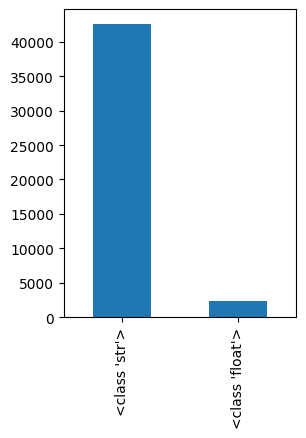

In [217]:
# Multiple data types for `Name of Procedure` column (e.g. some values are integer `4934600`, some values are string `Cardioversion`)
df_eda['p_procedure_name'].apply(lambda val: type(val)).value_counts().plot(kind='bar', figsize=(3,4))

### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>Algorithm</strong></span>

In [218]:
# Algorithm
# Categorical: Between hospitals, KL divergence
# Numeric: Between hospitals, KL divergence
# Numeric: In hospital
# Date
def algo(df, h_name_col):
    for col in list(df_raw.columns).remove('h_name_col'):
        # Abnormal data types
        d_type = {type(val) for val in df[col].unique()}
        d_type_len = len(d_type)
        if d_type_len > 1:
            print("Wrong")
        break

### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>Appendix</strong></span>